In [1]:
from torch.nn import BCEWithLogitsLoss, BCELoss
from torch.optim import Adam
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from torchvision import transforms
from imutils import paths
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch
import time
import os
import numpy as np

from Utils import loader, loss
from Train import train
from Model import Model

In [2]:
imdir_rs19 = '/home/physik/Dokumente/rs19/jpgs/rs19_val'
maskdir_rs19 = '/home/physik/Dokumente/rs19/uint8/rs19_val'
#imdir_rs19 = '/home/luis/Documents/ImSeg/rs19_val/jpgs/rs19_val'
#maskdir_rs19 = '/home/luis/Documents/ImSeg/rs19_val/uint8/rs19_val'
classes_ = {"rail-track"}
range_train = (0,0)
range_test = (2,2)
range_val = (7,8)

In [3]:
traindata = loader.dataset(imdir=imdir_rs19,
                      maskdir=maskdir_rs19,
                      numstart=range_train[0],
                      numend=range_train[1],
                      classes=classes_)

testdata = loader.dataset(imdir=imdir_rs19,
                      maskdir=maskdir_rs19,
                      numstart=range_test[0],
                      numend=range_test[1],
                      classes=classes_)

valdata = loader.dataset(imdir=imdir_rs19,
                      maskdir=maskdir_rs19,
                      numstart=range_val[0],
                      numend=range_val[1],
                      classes=classes_)

In [4]:
traindata[0][1].shape

torch.Size([1, 1080, 1920])

In [5]:
traindata[0][0].shape

torch.Size([3, 1080, 1920])

In [6]:
traindata[0][1].dtype

torch.float32

In [7]:
len(traindata)

1

In [19]:
batchsize = 1
#loss = torch.nn.BCEWithLogitsLoss()
lossf = loss.DiceLoss()
optim = 'Adam'
lr = 0.01
momentum = 0.01
decay_rate = 0.9
decay_steps = 100
num_epochs = 1000
model_path = ""

In [20]:
model = Model.UNet(num_classes=1,enc_channels=(3,16,32,64,128,256,512,1024),dec_channels=(1024,512,256,128,64,32,16))

In [21]:
Trainer = train.TrainSeg(model,
                         traindata,
                         testdata,
                         valdata,
                         classes_,
                         lossf,
                         optim,
                         batchsize,
                         lr,
                         momentum,
                         decay_rate,
                         decay_steps,
                         num_epochs,
                         model_path)

In [22]:
Trainer.train()

Epoch: 1/1000
Train loss: 0.893686, Test loss: 0.9484, Learning rate: 0.010000
Epoch: 2/1000
Train loss: 0.874242, Test loss: 0.9463, Learning rate: 0.010000
Epoch: 3/1000
Train loss: 0.896280, Test loss: 0.9463, Learning rate: 0.010000


Exception ignored in: <function _releaseLock at 0x7fde890a1f70>
Traceback (most recent call last):
  File "/home/physik/anaconda3/lib/python3.9/logging/__init__.py", line 227, in _releaseLock
    def _releaseLock():
KeyboardInterrupt: 


KeyboardInterrupt: 

In [ ]:
Trainer.val()

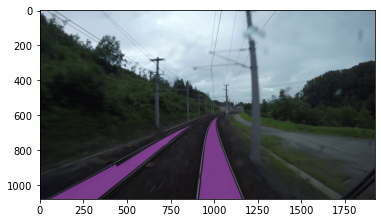

In [73]:
loader.visualize_result(traindata[0][0],traindata[0][1][0,:,:])

In [17]:
result = torch.sigmoid(model(traindata[0][0].unsqueeze(0)))

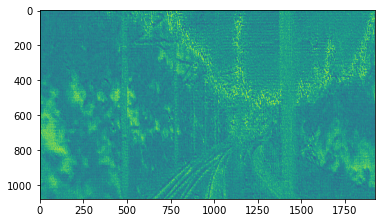

In [18]:
plt.imshow(result.detach().numpy()[0][0])

In [25]:
result[result>=0.5]=1.

In [ ]:
loader.visualize_result(traindata[0][0],result[0][0])

In [14]:
torch.min(result)

tensor(1., grad_fn=<MinBackward1>)

In [15]:
torch.max(result)

tensor(1., grad_fn=<MaxBackward1>)

In [ ]:
result.shape

In [ ]:
zeros = torch.zeros((1,1080,1920))

In [ ]:
loss(result[0],traindata[0][1])

In [37]:
Trainer.model_path = "/home/luis/Documents/ImSeg/SavedModels/Model_23102022"

In [38]:
Trainer.save()

In [ ]:
Trainer.load()